# Object Detection and Tracking Exercise


### Step 1: Import Important Packages


In [29]:
import IPython.display as ipd
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm


### Step 2: Display Video


In [5]:
ipd.Video('/content/026c7465-309f6d33.mp4', width=500)

### Step 3: Read Video Metadata


In [7]:
cap = cv2.VideoCapture('/content/026c7465-309f6d33.mp4') # Open the video file
# get the number of frame
frame_num=cap.get(cv2.CAP_PROP_FRAME_COUNT)
frame_num

2398.0

In [8]:
#get the witdh & Hieght of Video
width=cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height=cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width,height

(1280.0, 720.0)

In [9]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
fps

59.94005994005994

In [10]:
cap.release() # to closed and realead teh video file

### Step 4: Extract and Display Video Frames


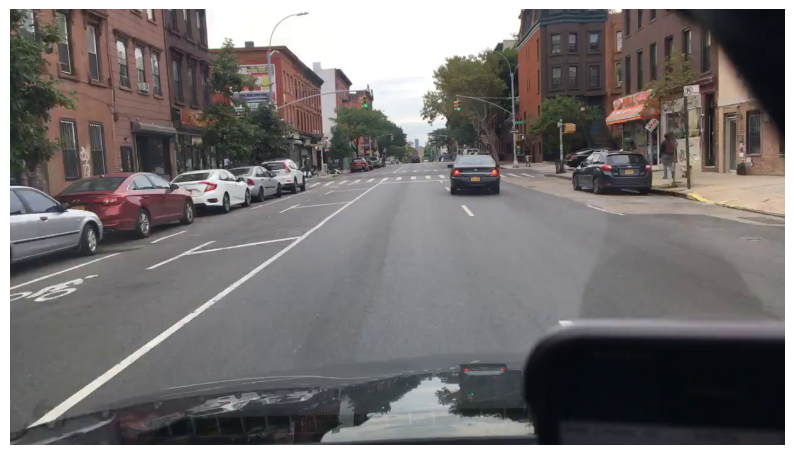

In [14]:
# Function to display OpenCV images
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convert the image from BGR  to RGB

    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_) # Display the image
    ax.axis('off') # Turn off the axis
    plt.show()

# Display a frame from a video
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')  # Open the video file
ret, img = cap.read()  # Read the first frame from the video
cap.release()
if ret:
    display_cv2_img(img)

### Step 5: Annotate Frames with Labels


In [18]:
# Read the labels from CSV file
labels = pd.read_csv('labels.csv', low_memory=False)
# Filter labels for the video
video_labels = labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True)
#Calculate and video frame numbers
video_labels['video_frame'] = (video_labels['frameIndex'] * 11.9).round().astype(int)


annotate and show frame number 1035 (Selected Randomly)

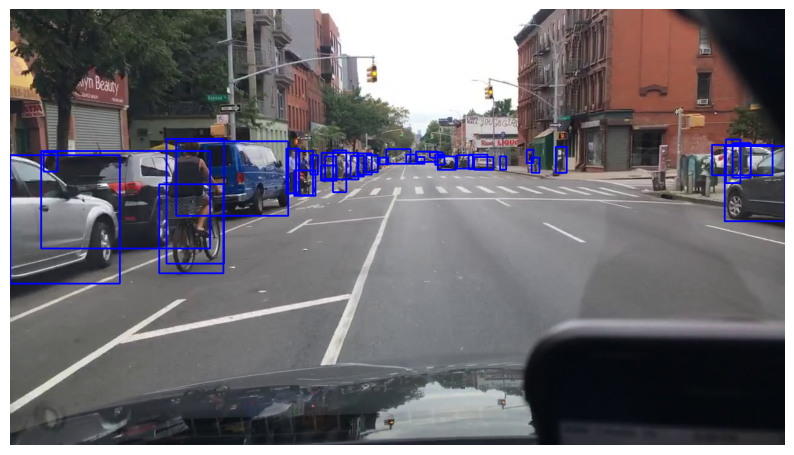

In [21]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4') # open the video file
for frame in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, img = cap.read() #read the current frame
    if frame == 1035: # stop when reach to selected frame
        break
cap.release()
# Annotate the frame
frame_labels = video_labels.query('video_frame == 1035')  # choose labels for the specific frame (1035)
for _, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img, pt1, pt2, (255, 0, 0), 2)
display_cv2_img(img) # Show the annotated frame

###Step 6: Displaying Objects Colored by Category

In [19]:
video_labels["category"].value_counts()

,count
category,
car,3030
pedestrian,847
bicycle,381
rider,320
truck,194
other vehicle,115
bus,109
other person,74
motorcycle,67


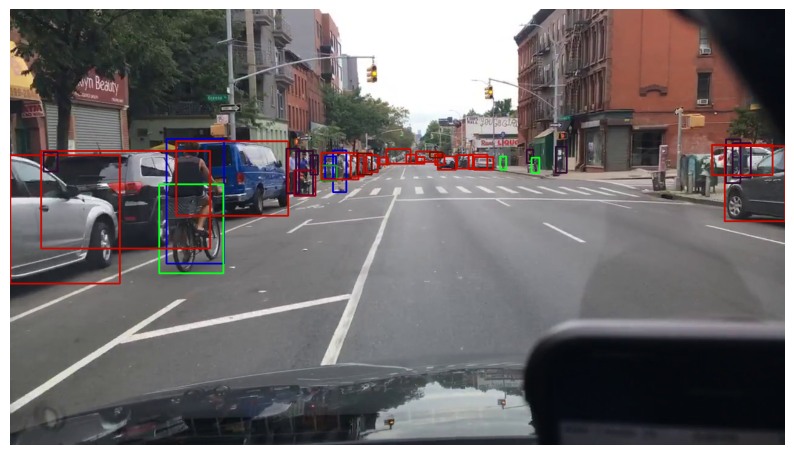

In [26]:
#color for categories
color_map = {
    "car": (0, 10, 200),
    "pedestrian": (50, 10, 50),
    "bicycle": (30, 255, 10),
    "rider": (200, 0, 5),
    "truck": (0, 10, 100),
    "other vehicle": (20, 0, 150),
    "bus": (0, 20, 100),
    "other person": (20, 10, 0),
    "motorcycle": (40, 150, 30),
    "trailer": (0, 140, 150),
}
img_example = img.copy() #get copy of the image
frame_labels = video_labels.query('video_frame == 1035')

for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    cv2.rectangle(img_example, pt1, pt2, color, 2)

display_cv2_img(img_example)


###Step 7: Adding Text

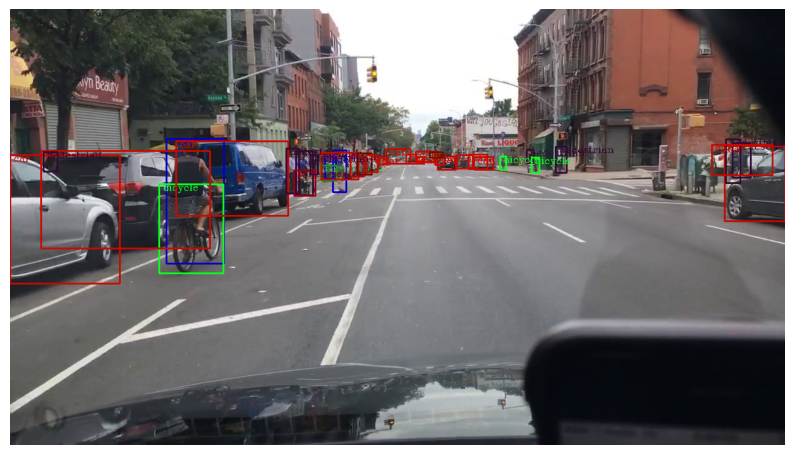

In [27]:
frame_labels = video_labels.query("video_frame == @frame")
font = cv2.FONT_HERSHEY_COMPLEX #Font for text
#get copy of image
img_example = img.copy()
for i, d in frame_labels.iterrows():
    pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
    pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
    color = color_map[d["category"]]
    img_example = cv2.rectangle(img_example, pt1, pt2, color, 2)
    pt_text = int(d["box2d.x1"]) + 5, int(d["box2d.y1"] + 10)
    img_example = cv2.putText(img_example, d["category"], pt_text, font, 0.5, color)
display_cv2_img(img_example)
cap.release()

### Step 8: Save Annotated Video


In [31]:
# Function to add annotations to video
def add_annotations(img, frame, video_labels):
    max_frame = video_labels.query('video_frame <= @frame')['video_frame'].max()
    frame_labels = video_labels.query('video_frame == @max_frame')
    for _, d in frame_labels.iterrows():
        pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
        pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
        color = color_map[d["category"]]
        img = cv2.rectangle(img, pt1, pt2, color, 2)
    return img

# Writing annotations to video
out = cv2.VideoWriter('save_Video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 59.94, (1280, 720)) # video save and format
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
for frame in tqdm(range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))):
    ret, img = cap.read()
    if not ret:
        break
    img = add_annotations(img, frame, video_labels) # Adding annotations to the current frame
cap.release() #Release the captured video
out.release() #Release the saved video

100%|██████████| 2398/2398 [00:31<00:00, 76.76it/s]
